In [15]:
suppressPackageStartupMessages(library(tidyverse))
df <- readr::read_csv('data/exams.csv', show_col_types = FALSE)
head(df)

gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
female,group B,associate's degree,standard,none,71,83,78


# Analyzing exam scores

Now let's now move on to the competition and challenge.

## 📖 Background
Your best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams.

Since you have recently learned data manipulation and visualization, you suggest helping your friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## 💾 The data

#### The file has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing

In [17]:
head(df)

gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
female,group B,associate's degree,standard,none,71,83,78


## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 
6. Summarize your findings.

## ⌛️ Time is ticking. Good luck!

# Summary of Findings

## Effect of Test Prepartation Course

The effect of the test preparation course resulted in an increase of the average reading score by 7 points when compared to students who did not take the test preparation course.

In [18]:
# Average reading scores for students with/without the test prep course
df %>%
	group_by(test_prep_course) %>%
	summarise(avg_reading_score = round(mean(reading),2)) %>%
	arrange(avg_reading_score)

test_prep_course,avg_reading_score
<chr>,<dbl>
none,66.53
completed,73.89


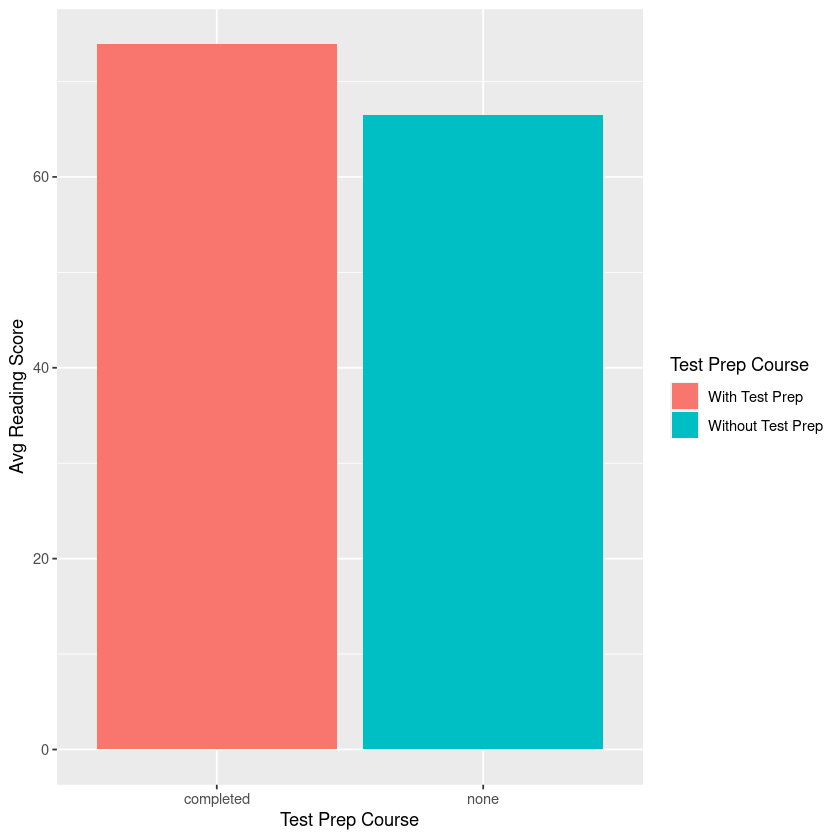

In [19]:
#Aveage Reading score based on test prep course
df %>%
  group_by(test_prep_course) %>%
  summarise(avg_reading_score = round(mean(reading),2)) %>%
  ggplot(aes(test_prep_course, avg_reading_score, fill = test_prep_course)) +
  geom_col()+
  labs(x = "Test Prep Course",
	  y = "Avg Reading Score",
	  fill = "Test Prep Course")+
  scale_fill_discrete(labels = c("With Test Prep", "Without Test Prep"))

## Average Scores Based on Parental Education Levels

Looking at the background of the education level of the student's parents, there is a trend that students whose parents have had at least some college education shows an increase in the average math, reading, and writing scores. However, the student's whose parents only had some high school education had a higher average score compared to student's whose parents completed high school.

In [20]:
#Average scores based on different parental education levels
df %>%
  group_by(parent_education_level) %>%
  summarise(avg_math_score = round(mean(math), 2),
            avg_reading_score = round(mean(reading), 2),
            avg_writing_score = round(mean(writing), 2))

parent_education_level,avg_math_score,avg_reading_score,avg_writing_score
<chr>,<dbl>,<dbl>,<dbl>
associate's degree,67.88,70.93,69.90
bachelor's degree,69.39,73.00,73.38
high school,62.14,64.70,62.45
master's degree,69.75,75.37,75.68
some college,67.13,69.46,68.84
some high school,63.50,66.94,64.89


In [21]:
avg_score_parent<- df %>%
	group_by(parent_education_level) %>%
	summarise(avg_math_score = round(mean(math), 2),
            avg_reading_score = round(mean(reading), 2),
            avg_writing_score = round(mean(writing), 2)) %>%
	pivot_longer(cols = c('avg_math_score', 'avg_reading_score', 'avg_writing_score'),
				 names_to = 'category',
				 values_to = 'avg_scores')

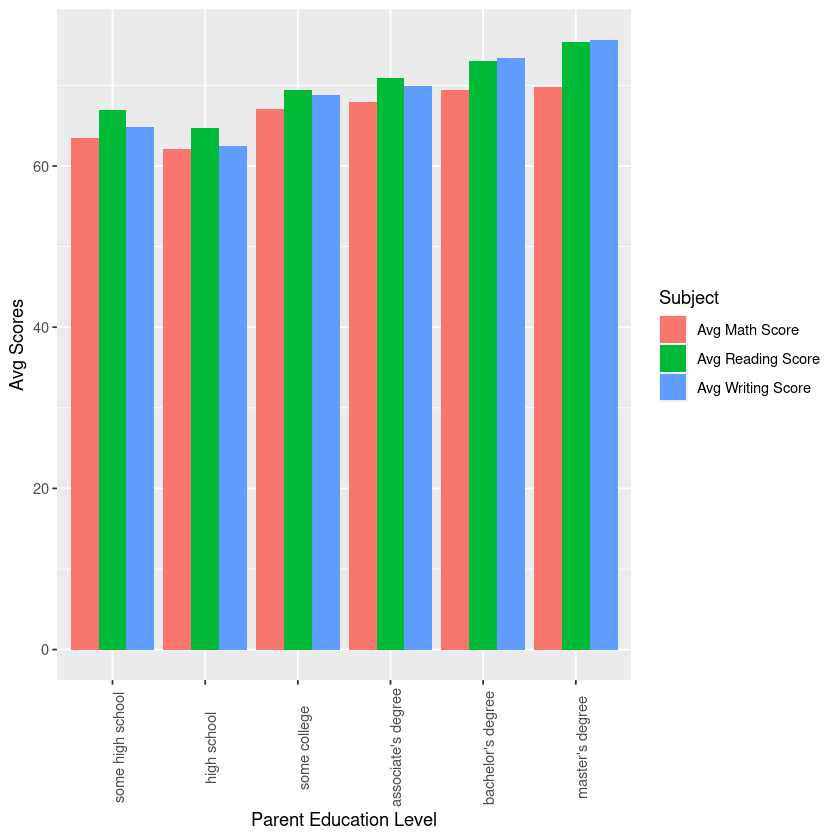

In [22]:
#Average score based on Parent Education Level
avg_score_parent %>%
  ggplot(aes(x = factor(parent_education_level, levels = c("some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree")), y = avg_scores, fill = category)) +
  geom_col(position = "dodge") +
  labs(x = "Parent Education Level", y = "Avg Scores", fill = "Subject") +
  scale_fill_discrete(labels = c("Avg Math Score", "Avg Reading Score", "Avg Writing Score")) +
  theme(axis.text.x = element_text(angle = 90))

## Comparing average scores for students with/without the test preparation course based on different parental education levels

Looking deeper in the data by averaging student's scores based on not only their parent's education background but also if they took the test preparation course shows a bigger point difference if students took the test preparation course. The trend remains that the average score was higher if their parents came from an educated background.

In [23]:
parent_prep_score<- df %>%
	group_by(parent_education_level, test_prep_course) %>%
	summarise(avg_math_score = round(mean(math), 2),
            avg_reading_score = round(mean(reading), 2),
            avg_writing_score = round(mean(writing), 2)) %>%
	pivot_longer(cols = c('avg_math_score', 'avg_reading_score', 'avg_writing_score'),
				 names_to = 'category',
				 values_to = 'avg_scores')

`summarise()` has grouped output by 'parent_education_level'. You can override
using the `.groups` argument.


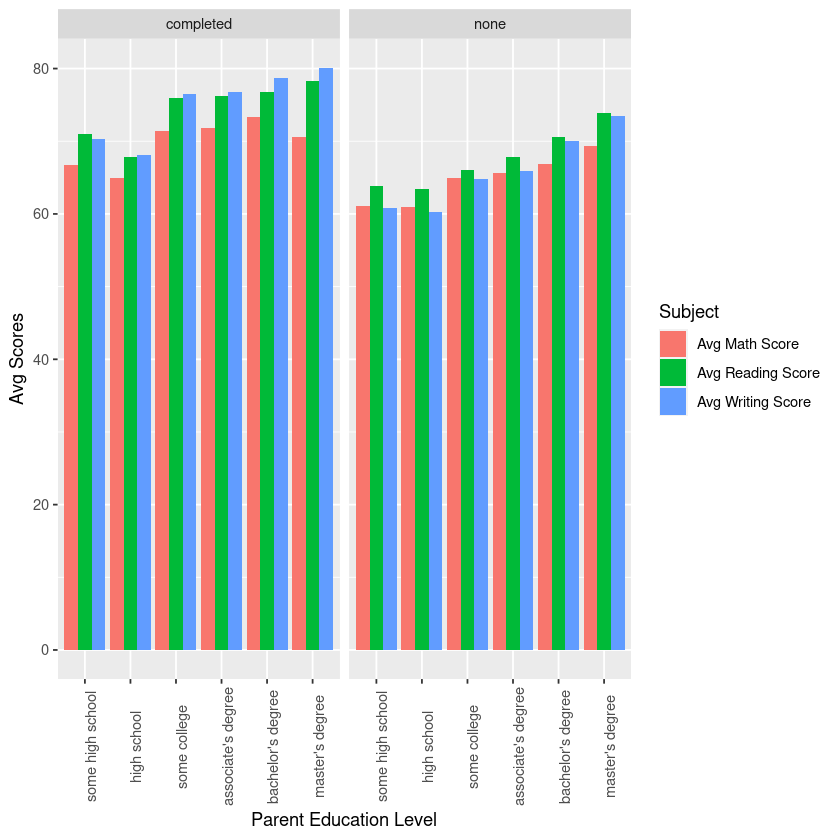

In [24]:
#Average score based on Parental education level separated by test prep course
parent_prep_score %>%
	ggplot(aes(x = factor(parent_education_level, levels = c("some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree")), y = avg_scores, fill = category))+
	geom_col(position = "dodge")+
	facet_grid(~test_prep_course)+
	labs(x = "Parent Education Level", 
		 y = "Avg Scores", 
		 fill = "Subject")+
	scale_fill_discrete(labels = c("Avg Math Score", "Avg Reading Score", "Avg Writing Score"))+
	theme(axis.text.x = element_text(angle = 90))

## Correlation between reading, writing, and math scores

Finally, we looked to see if there was a correlation to see if students performed well in one subject would also perform well in other subjects. The visualizations show that there is a positive correlation that if a student performed well in math, writing, or reading that they would also perform well in the other subjects. The strongest correlation when comparing the writing and reading scores, but there was still a strong correlation when math scores were compared with reading and writing scores.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


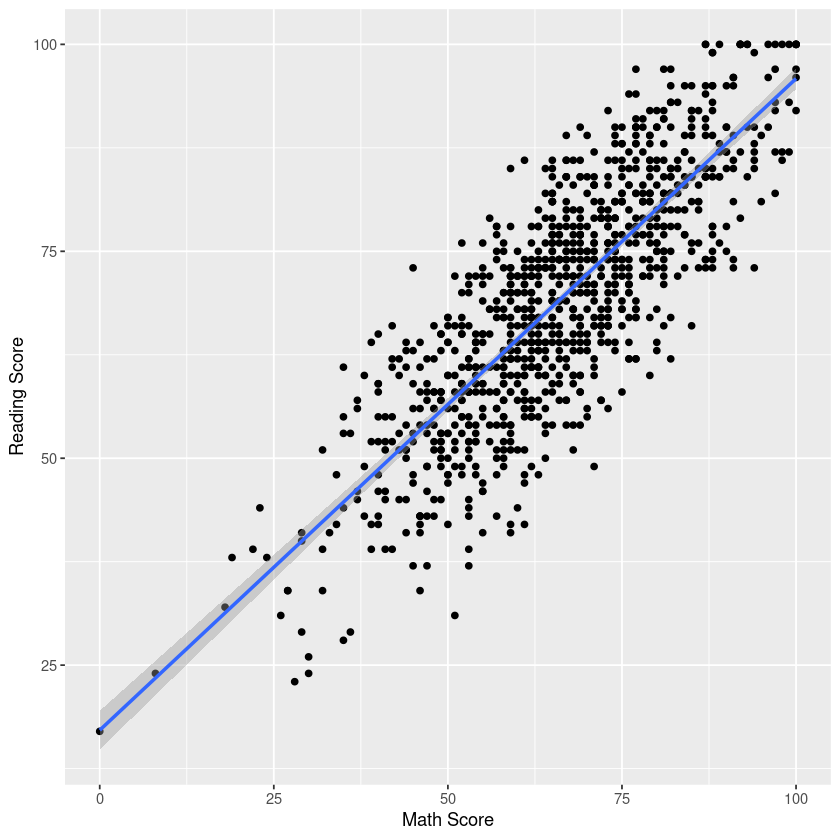

`geom_smooth()` using formula = 'y ~ x'


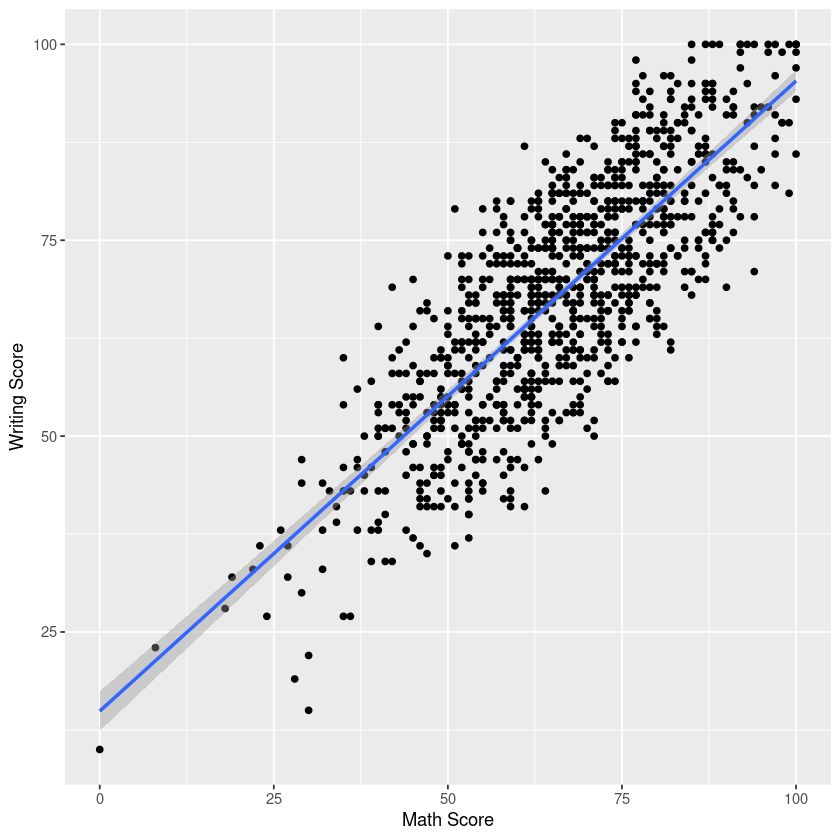

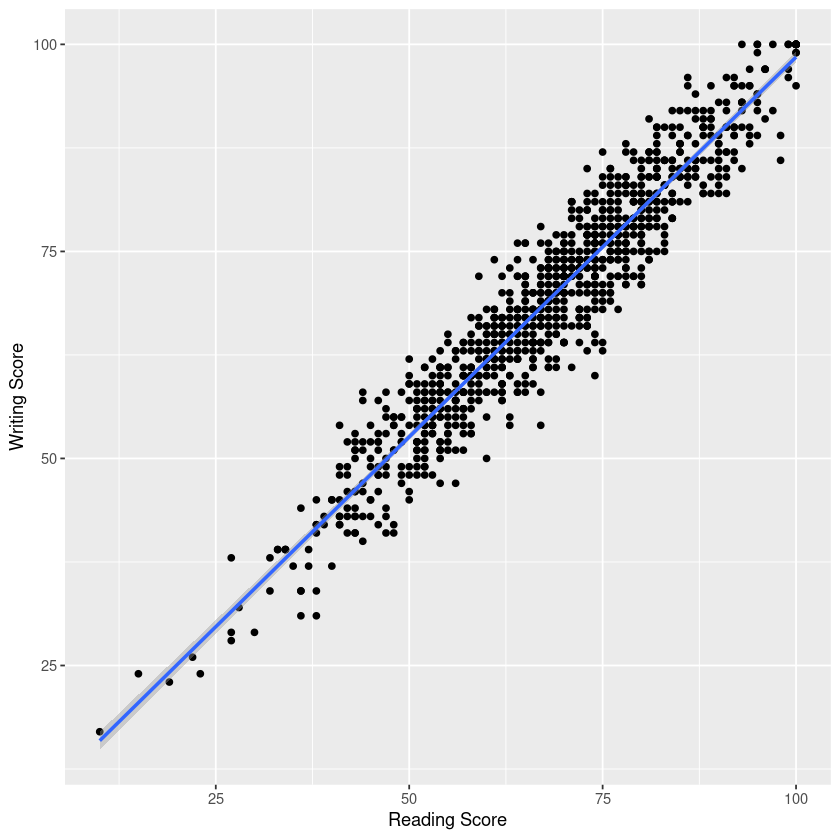

In [25]:
#Scatter Plot Math vs Reading score
df %>%
	ggplot(aes(math, reading))+
	geom_point()+
	geom_smooth(method = lm)+
	labs(x = "Math Score",
		y = "Reading Score")

#Scatter Plot Math vs Writing score
df %>%
	ggplot(aes(math, writing))+
	geom_point()+
	geom_smooth(method = lm)+
	labs(x = "Math Score",
		y = "Writing Score")

#Scatter Plot Reading vs Writing score
df %>%
	ggplot(aes(writing, reading))+
	geom_point()+
	geom_smooth(method = lm)+
	labs(x = "Reading Score",
		y = "Writing Score")